# In this assignment we learn about numerical stabiity of the covariance matrix, fitting $\chi^2$ distributions, to correct for the Hartlap factor.

## For this assignment no external packages are required. You just need a running conda environment, where numpy and matplotlib are installed.

In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
from numpy.linalg import inv
from scipy.special import gamma, factorial
from scipy.optimize import curve_fit
from scipy.stats import chi2 as chi2_scp

## Preparation: load in the data we need for this assignment.

In [2]:
model=np.load('data_4_assignment1/reference_model.npy') # This will be our reference model
cov=np.load('data_4_assignment1/covariance.npy') # This is the analytical covariance matrix, which we assume is the true covariance of the data

## Task 1: Create two sets of 10000 noisy Gaussian data vectors each using the provided reference model and true covariance matrix. 

In [3]:
noisy_data_set1 = np.random.multivariate_normal(model, cov, size = 10000)
noisy_data_set2 = np.random.multivariate_normal(model, cov, size = 10000)

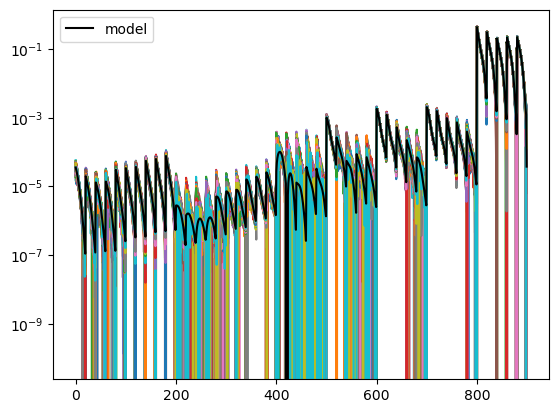

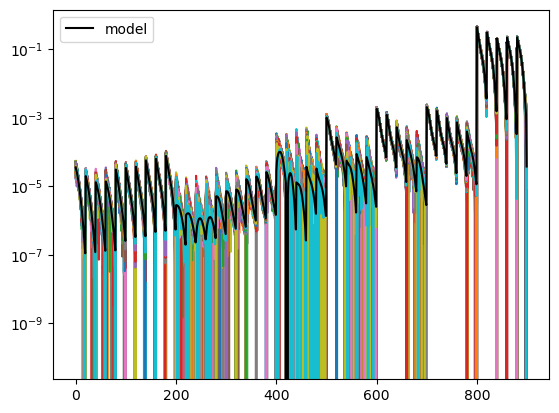

In [4]:
# check that the noisy data vector scatter around the truth
plt.figure(0)
for i in range(1000):
    plt.plot(noisy_data_set1[i])
plt.plot(model,c='k',zorder=3,label='model')
plt.yscale('log')
plt.legend()

plt.figure(1)
for i in range(1000):
    plt.plot(noisy_data_set2[i])
plt.plot(model,c='k',zorder=3,label='model')
plt.yscale('log')
plt.legend()

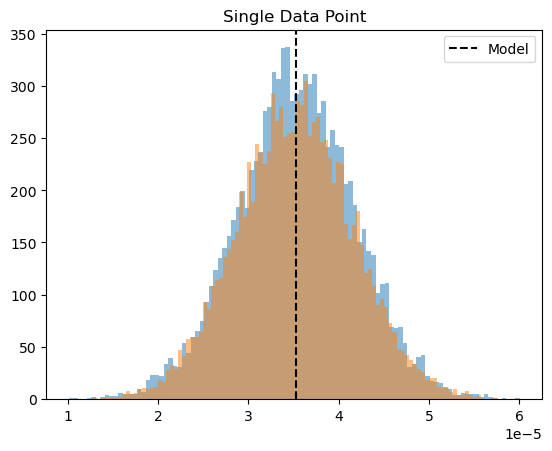

In [5]:
plt.title('Single Data Point')
plt.axvline(x=model[0],c='k',ls='--',label='Model')
plt.hist(noisy_data_set1[:,0],bins=100,alpha=0.5)
plt.hist(noisy_data_set2[:,0],bins=100,alpha=0.5)
plt.legend()

We see in the plot of 1000 data vectors that the different data vectors (colored lines) trace the model (black line) closely.
<br>
We see that upon inspection of a single data point, plotting a histogram of the values of the 10000 data vectors shows roughly a gaussian distribution around the model value.

## Task 2: 
#### Use the provided covariance matrix and the model as a reference.
### 2.1: Test if set 1 follows a $\chi^2$ distribution with the correct degrees of freedom, by measuring its mean and variance. 
### 2.2: Convince yourself, that the measured $\chi^2$ follows a $\chi^2$ distribution.

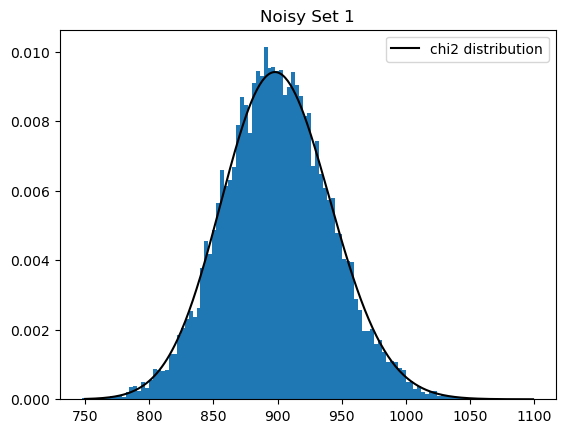

In [6]:
inv_cov = inv(cov)
chi2 = []
# compute the chi^2 for all dv 
for i in range(len(noisy_data_set1)):
    chi2.append(np.matmul(np.matmul(model-noisy_data_set1[i],inv_cov),model-noisy_data_set1[i]))

# What should the mean and variance should be?
mean = 900
variance = 2*mean

# is the overall distribution right?
plt.title('Noisy Set 1')
plt.hist(chi2, bins=100, density=True)
x = np.arange(750,1100)
plt.plot(x,chi2_scp.pdf(x,900),label='chi2 distribution',c='k')
plt.legend()

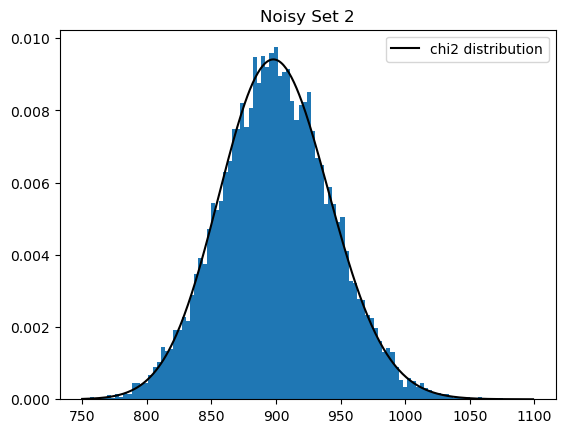

In [7]:
inv_cov = inv(cov)
chi2 = []
# compute the chi^2 for all dv 
for i in range(len(noisy_data_set2)):
    chi2.append(np.matmul(np.matmul(model-noisy_data_set2[i],inv_cov),model-noisy_data_set2[i]))

# What should the mean and variance should be?
mean = 900
variance = 2*mean

# is the overall distribution right?
plt.title('Noisy Set 2')
plt.hist(chi2, bins=100, density=True)
x = np.arange(750,1100)
plt.plot(x,chi2_scp.pdf(x,900),label='chi2 distribution',c='k')
plt.legend()

We see that the histograms of $\chi^2$ values of both data sets follow the model $\chi^2$ very closely.

### After convincing us that the two sets actually follow a $\chi^2$ distribution, if we use the analytical covariance matrix, we want to check if that is also true if we measure the covariance matrix from simulations. 
### As running simulations is too expensive, we simulate measurements from simulations with the created set 2. 
### Task 3: As a preparation, please measure the numerical covariance matrix from [500,1000,5000,10000] data vectors from set 2. What do you observe in the correlation matrix? Are the covariances positive semi-definite?

In [5]:
cov_num500 = np.cov(noisy_data_set2[0:500], rowvar=False)
cov_num1000 = np.cov(noisy_data_set2[0:1000], rowvar=False)
cov_num5000 = np.cov(noisy_data_set2[0:5000], rowvar=False)
cov_num10000 = np.cov(noisy_data_set2[0:10000], rowvar=False)

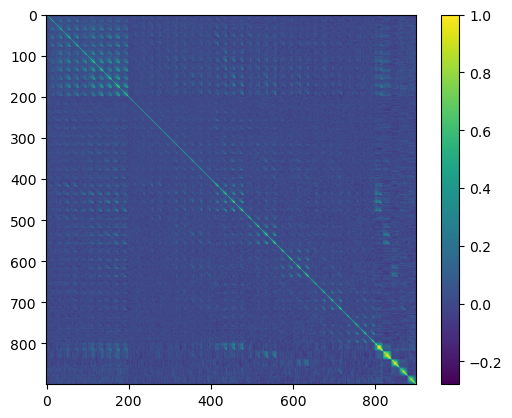

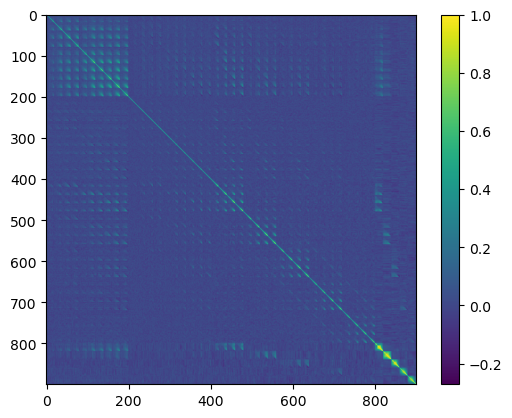

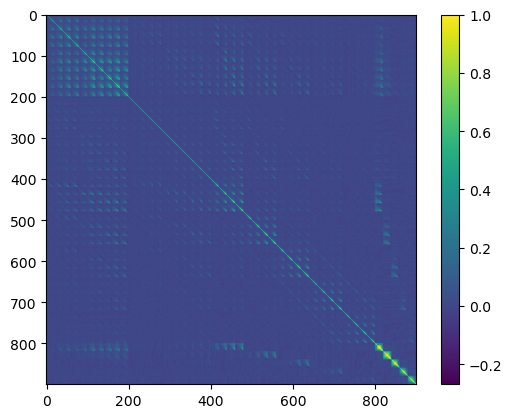

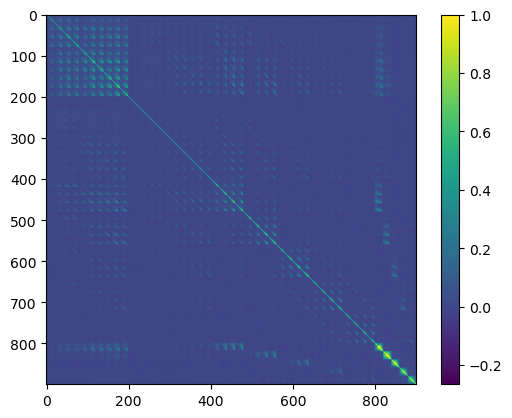

In [9]:
plt.figure(0)
plt.imshow(cov_num500/np.outer(np.sqrt(np.diag(cov_num500)),np.sqrt(np.diag(cov_num500))))
plt.colorbar()

plt.figure(1)
plt.imshow(cov_num1000/np.outer(np.sqrt(np.diag(cov_num1000)),np.sqrt(np.diag(cov_num1000))))
plt.colorbar()

plt.figure(2)
plt.imshow(cov_num5000/np.outer(np.sqrt(np.diag(cov_num5000)),np.sqrt(np.diag(cov_num5000))))
plt.colorbar()

plt.figure(3)
plt.imshow(cov_num10000/np.outer(np.sqrt(np.diag(cov_num10000)),np.sqrt(np.diag(cov_num10000))))
plt.colorbar()


In [10]:
eigs1 = np.linalg.eig(cov_num500)
eigs2 = np.linalg.eig(cov_num1000)
eigs3 = np.linalg.eig(cov_num5000)
eigs4 = np.linalg.eig(cov_num10000)

In [11]:
print(np.all(eigs1[0] >= 0))
print(np.all(eigs2[0] >= 0))
print(np.all(eigs3[0] >= 0))
print(np.all(eigs4[0] >= 0))

False
True
True
True


We observe a symmetric correlation matrix, where the values are all 1 along the diagonal.
<br>
The only covariance matrix that is not positive semi-definite is the one made with 500 data vectors (we verified this by checking if any of the eigenvalues of the matrix were negative). This is expected, since there are less data vectors than data points in the model.

### Task 4: Test for all four covariance matrices if you recover a $\chi^2$ distribution with the mean and variance. What do you observe? 

For cov500, mean = -1.0530920961461198e+16, variance = 3.5006253780532777e+34
For cov1000, mean = 9134.181066714003, variance = 1918360.615220848
For cov5000, mean = 1097.7913758916393, variance = 3273.6913307982277
For cov10000, mean = 988.8519353328998, variance = 2413.1297777551054


'\nThis histogram looks like a good chi2 distribution, and the mean & variance are somewhat close to the expected values.\n'

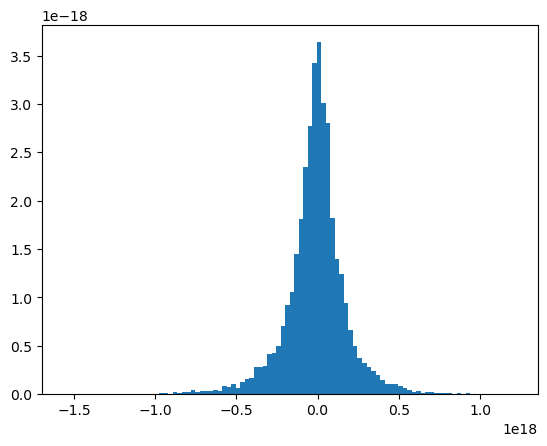

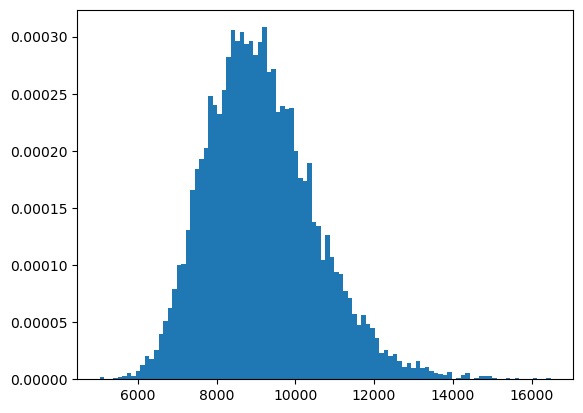

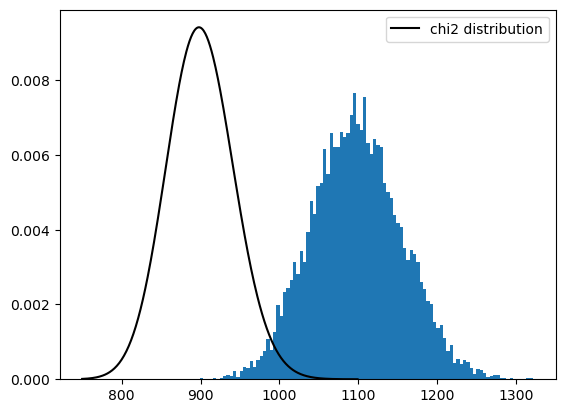

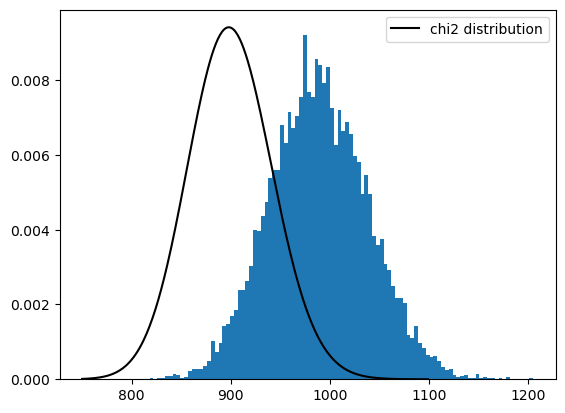

In [8]:
inv_cov = inv(cov_num500)
chi2 = []
for i in range(10000):
    chi2.append(np.matmul(np.matmul(model-noisy_data_set1[i],inv_cov),model-noisy_data_set1[i]))
plt.figure(0)
plt.hist(chi2, bins=100, density=True)

#print(mean and variance)
print('For cov500, mean = {}, variance = {}'.format(np.mean(chi2),np.var(chi2)))
#comment your result
"""
This covariance matrix had negative eigenvalues, so we expected the chi2 histogram to be messy/wrong, which is what is shown.
"""

#Do it for the covariance matrices
inv_cov = inv(cov_num1000)
chi2 = []
for i in range(10000):
    chi2.append(np.matmul(np.matmul(model-noisy_data_set1[i],inv_cov),model-noisy_data_set1[i]))
plt.figure(1)
plt.hist(chi2, bins=100, density=True)

#print(mean and variance)
print('For cov1000, mean = {}, variance = {}'.format(np.mean(chi2),np.var(chi2)))
#comment your result
"""
The histogram looks like a chi2 distribution but the mean & variance are very off.
"""

inv_cov = inv(cov_num5000)
chi2 = []
for i in range(10000):
    chi2.append(np.matmul(np.matmul(model-noisy_data_set1[i],inv_cov),model-noisy_data_set1[i]))
plt.figure(2)
plt.hist(chi2, bins=100, density=True)
plt.plot(x,chi2_scp.pdf(x,900),label='chi2 distribution',c='k')
plt.legend()

#print(mean and variance)
print('For cov5000, mean = {}, variance = {}'.format(np.mean(chi2),np.var(chi2)))
#comment your result
"""
This histogram looks more like a gaussian than a chi2 distribution, and the mean & variance are a bit too large.
"""

inv_cov = inv(cov_num10000)
chi2 = []
for i in range(10000):
    chi2.append(np.matmul(np.matmul(model-noisy_data_set1[i],inv_cov),model-noisy_data_set1[i]))
plt.figure(3)
plt.hist(chi2, bins=100, density=True)
x = np.arange(750,1100)
plt.plot(x,chi2_scp.pdf(x,900),label='chi2 distribution',c='k')
plt.legend()

#print(mean and variance)
print('For cov10000, mean = {}, variance = {}'.format(np.mean(chi2),np.var(chi2)))
#comment your result
"""
This histogram looks like a good chi2 distribution, and the mean & variance are somewhat close to the expected values.
"""

We observe that the first histogram is a complete mess, not remotely close to a chi2 distribution. This is expected since the covariance matrix used was the one generated with less data vectors than model data points.
<br>
The second and third histograms look similar to a $\chi^2$ distribution, but do not have the right values for the mean or variance.
<br>
The last histogram appears to closely follow a $\chi^2$ distribution, but the mean and variance are still off.

### Task 5: Repeat the same exercise from before, but debias your inverse covriance matrix with the so-called Hartlap factor. What do you observe?

For cov500, mean = 8483828109233268.0, variance = 2.271938922313251e+34
For cov1000, mean = 896.0457903283005, variance = 18460.838564872203
For cov5000, mean = 899.9297976403157, variance = 2199.962930279932
For cov10000, mean = 899.7474655124236, variance = 1997.834033073366


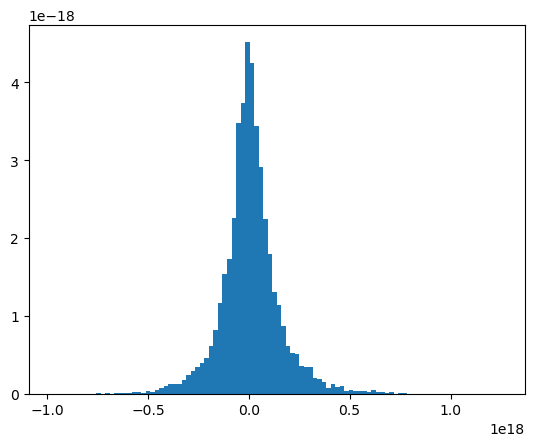

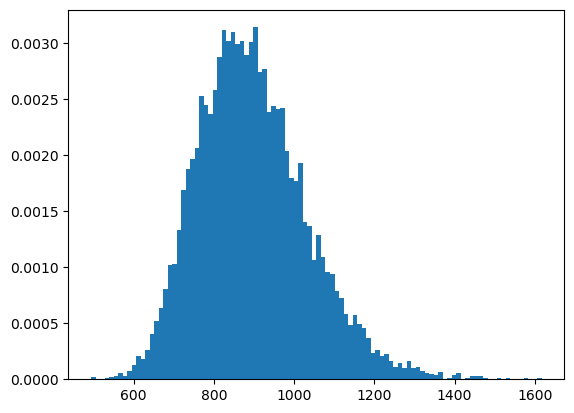

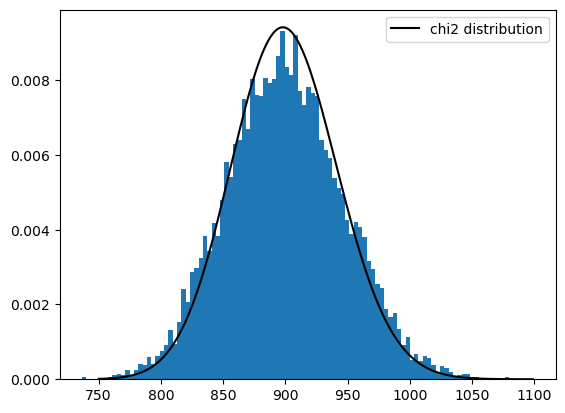

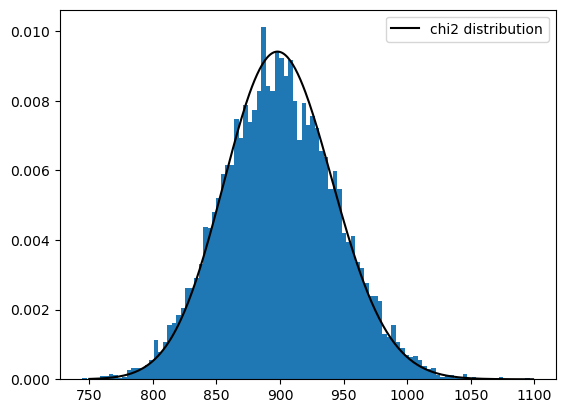

In [14]:
n_d = 900 # diemension of the model

n_r = 500 # number of realisations used 
h = (n_r-1)/(n_r-n_d-2)

inv_cov = inv(cov_num500)/h

#.... plot and check mean and variance
chi2 = []
for i in range(10000):
    chi2.append(np.matmul(np.matmul(model-noisy_data_set1[i],inv_cov),model-noisy_data_set1[i]))
plt.figure(0)
plt.hist(chi2, bins=100, density=True)

#print(mean and variance)
print('For cov500, mean = {}, variance = {}'.format(np.mean(chi2),np.var(chi2)))


n_r = 1000 # number of realisations used 
h = (n_r-1)/(n_r-n_d-2)

inv_cov = inv(cov_num1000)/h

#.... plot and check mean and variance
chi2 = []
for i in range(10000):
    chi2.append(np.matmul(np.matmul(model-noisy_data_set1[i],inv_cov),model-noisy_data_set1[i]))
plt.figure(1)
plt.hist(chi2, bins=100, density=True)

#print(mean and variance)
print('For cov1000, mean = {}, variance = {}'.format(np.mean(chi2),np.var(chi2)))


n_r = 5000 # number of realisations used 
h = (n_r-1)/(n_r-n_d-2)

inv_cov = inv(cov_num5000)/h

#.... plot and check mean and variance
chi2 = []
for i in range(10000):
    chi2.append(np.matmul(np.matmul(model-noisy_data_set1[i],inv_cov),model-noisy_data_set1[i]))
plt.figure(2)
plt.hist(chi2, bins=100, density=True)
plt.plot(x,chi2_scp.pdf(x,900),label='chi2 distribution',c='k')
plt.legend()

#print(mean and variance)
print('For cov5000, mean = {}, variance = {}'.format(np.mean(chi2),np.var(chi2)))


n_r = 10000 # number of realisations used 
h = (n_r-1)/(n_r-n_d-2)

inv_cov = inv(cov_num10000)/h

#.... plot and check mean and variance
chi2 = []
for i in range(10000):
    chi2.append(np.matmul(np.matmul(model-noisy_data_set1[i],inv_cov),model-noisy_data_set1[i]))
plt.figure(3)
plt.hist(chi2, bins=100, density=True)
plt.plot(x,chi2_scp.pdf(x,900),label='chi2 distribution',c='k')
plt.legend()

#print(mean and variance)
print('For cov10000, mean = {}, variance = {}'.format(np.mean(chi2),np.var(chi2)))

Aside from the histogram generated with the bad covariance matrix, the histograms are significantly improved. They much more closely resemble a $\chi^2$ distribution, and the variance and means are much closer to the true values than before (except for the cov_1000 histogram, whose variance is still very off).

### Task 6: Repeat task 5 again, but this time, test if set 2 also follows a $\chi^2$ distribution. What do you observe?

For cov500, mean = 9660776716736712.0, variance = 2.2372657745656384e+34
For cov1000, mean = 815.5408149349531, variance = 75500.48934537735
For cov5000, mean = 819.1789840015973, variance = 8223.348054168962
For cov10000, mean = 818.9165058841309, variance = 1365.833303572793


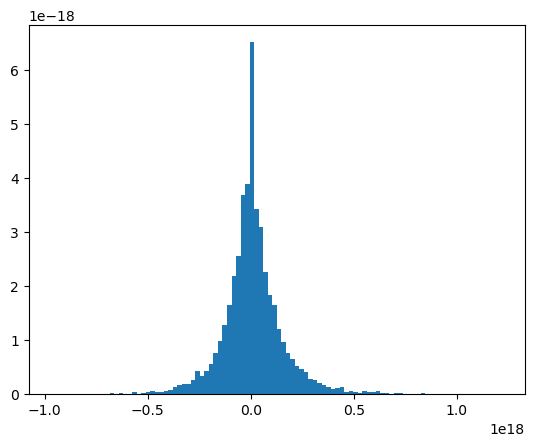

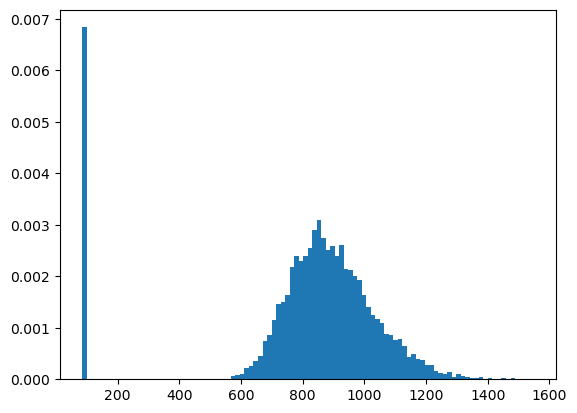

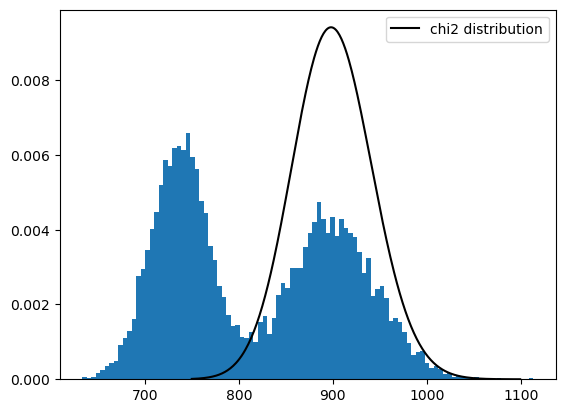

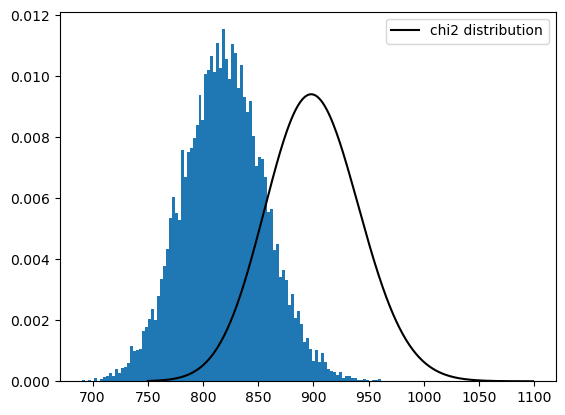

In [15]:
n_d = 900 # diemension of the model

n_r = 500 # number of realisations used 
h = (n_r-1)/(n_r-n_d-2)

inv_cov = inv(cov_num500)/h

#.... plot and check mean and variance
chi2 = []
for i in range(10000):
    chi2.append(np.matmul(np.matmul(model-noisy_data_set2[i],inv_cov),model-noisy_data_set2[i]))
plt.figure(0)
plt.hist(chi2, bins=100, density=True)

#print(mean and variance)
print('For cov500, mean = {}, variance = {}'.format(np.mean(chi2),np.var(chi2)))


n_r = 1000 # number of realisations used 
h = (n_r-1)/(n_r-n_d-2)

inv_cov = inv(cov_num1000)/h

#.... plot and check mean and variance
chi2 = []
for i in range(10000):
    chi2.append(np.matmul(np.matmul(model-noisy_data_set2[i],inv_cov),model-noisy_data_set2[i]))
plt.figure(1)
plt.hist(chi2, bins=100, density=True)

#print(mean and variance)
print('For cov1000, mean = {}, variance = {}'.format(np.mean(chi2),np.var(chi2)))


n_r = 5000 # number of realisations used 
h = (n_r-1)/(n_r-n_d-2)

inv_cov = inv(cov_num5000)/h

#.... plot and check mean and variance
chi2 = []
for i in range(10000):
    chi2.append(np.matmul(np.matmul(model-noisy_data_set2[i],inv_cov),model-noisy_data_set2[i]))
plt.figure(2)
plt.hist(chi2, bins=100, density=True)
plt.plot(x,chi2_scp.pdf(x,900),label='chi2 distribution',c='k')
plt.legend()

#print(mean and variance)
print('For cov5000, mean = {}, variance = {}'.format(np.mean(chi2),np.var(chi2)))


n_r = 10000 # number of realisations used 
h = (n_r-1)/(n_r-n_d-2)

inv_cov = inv(cov_num10000)/h

#.... plot and check mean and variance
chi2 = []
for i in range(10000):
    chi2.append(np.matmul(np.matmul(model-noisy_data_set2[i],inv_cov),model-noisy_data_set2[i]))
plt.figure(3)
plt.hist(chi2, bins=100, density=True)
plt.plot(x,chi2_scp.pdf(x,900),label='chi2 distribution',c='k')
plt.legend()

#print(mean and variance)
print('For cov10000, mean = {}, variance = {}'.format(np.mean(chi2),np.var(chi2)))


We notice that none of the histograms accurately represent a $\chi^2$ distribution. As expected the first histogram is still as bad as before, however the other histograms may include features (such as a bimodal distribution) and have the wrong mean & variance. 
<br>
This is a result of including the data vectors that were used to calculate the covariance matrix in the calculation of the $\chi^2$ values.

### Bonus Task 1: Create a new set of 10000 noisy data vectors using the numerical covariance matrix measured from 1000 noisy data vectors. Is it possible to reduce the noise in the covariance matrix with this method? Test if set 1 follows a $\chi^2$ distribution which the newly created covaraince matrix. What do you observe?

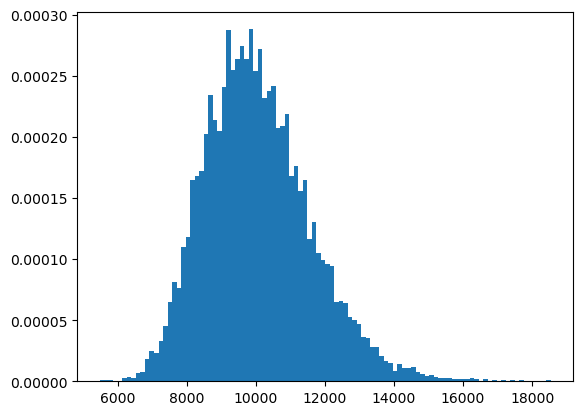

In [13]:
noisy_data_set3=np.random.multivariate_normal(model, cov_num1000, size= 10000)
cov_num10000_set3 = np.cov(noisy_data_set3, rowvar=False)

inv_cov = inv(cov_num10000_set3)
chi2 = []
for i in range(10000):
    chi2.append(np.matmul(np.matmul(model-noisy_data_set1[i],inv_cov),model-noisy_data_set1[i]))

plt.hist(chi2, bins=100, density=True)
plt.show()

We observe that although the histogram appears to follow a $\chi^2$ distribution, the mean and variance are very off.
<br>
We are creating 10000 new data sets based off of an originally noisy covariance matrix. This makes these new data sets effectively noisier, and thus creating a covariance matrix based on these data sets will be at least as noisy or noiser than the initial covariance matrix used. As a result of this, we conclude that it is not possible to reduce the noise in the covariance matrix with this method.

### Bonus task 2: What is the minimum number of data vectors such that the inverse covariance matrix is non-singular? What is an easy tool to test this? Is an analytical covariance matrix always invertible? What can you do if it is not invertible? 

In [52]:
for i in range(2,10000):
    # THIS WILL TAKE A LONG TIME TO RUN, CHANGE RANGE TO (800,10000) TO FIND RESULT FASTER
    cov = np.cov(noisy_data_set1[:i], rowvar=False)
    if (np.linalg.eigvals(cov) >= 0).all():
#         print(np.real(np.linalg.eigvals(cov)))
        print("Non-Singular at {} data vectors".format(i))
        break

Non-Singular at 901 data vectors


We expect the minimum number of data vectors such that the inverse covariance matrix is non-singular be 900. We tested this by verifying that all the eigenvalues from the generated covariance matrix are non-negative.
<br>
An analytical covariance matrix is not always invertible. This is troublesome because we need the inverse covariance matrix. We can get around this by applying singular value decomposition to the covariance matrix and retrieving the pseudoinverse.